In [176]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [177]:
data = pandas.read_csv('C:\\Users\\domma\\Desktop\\Studijos\\Magistras\\Duomenų analizė\\uzduotys\\Task_2\\winequality-red.csv', delimiter=';')
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [178]:
# Finding if there are null values in the dataset
print(data.isnull().values.any())

False


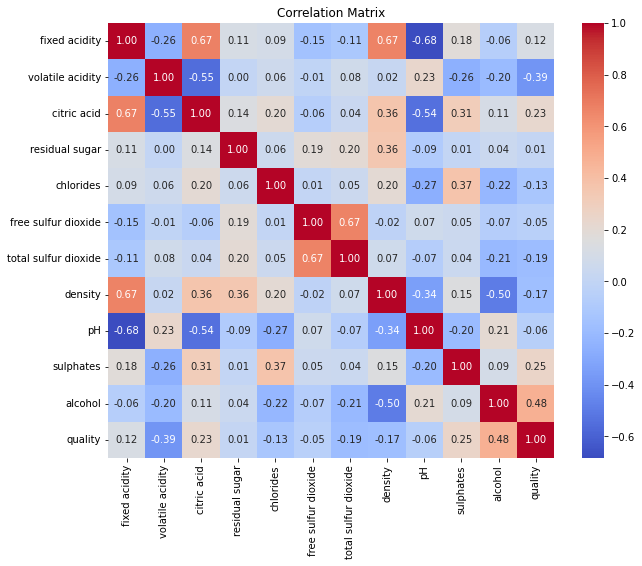

In [179]:
import seaborn as sns

correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [180]:
X1 = np.array(data['fixed acidity'])
Y1 = np.array(data['citric acid'])

X2 = np.array(data['pH'])
Y2 = np.array(data['fixed acidity'])

X3 = np.array(data['fixed acidity'])
Y3 = np.array(data['density'])


print(X1)
print(Y1)

print(X2)
print(Y2)

print(X3)
print(Y3)

[7.4 7.8 7.8 ... 6.3 5.9 6. ]
[0.   0.   0.04 ... 0.13 0.12 0.47]
[3.51 3.2  3.26 ... 3.42 3.57 3.39]
[7.4 7.8 7.8 ... 6.3 5.9 6. ]
[7.4 7.8 7.8 ... 6.3 5.9 6. ]
[0.9978  0.9968  0.997   ... 0.99574 0.99547 0.99549]


In [200]:
from sklearn.model_selection import train_test_split, cross_val_score

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)

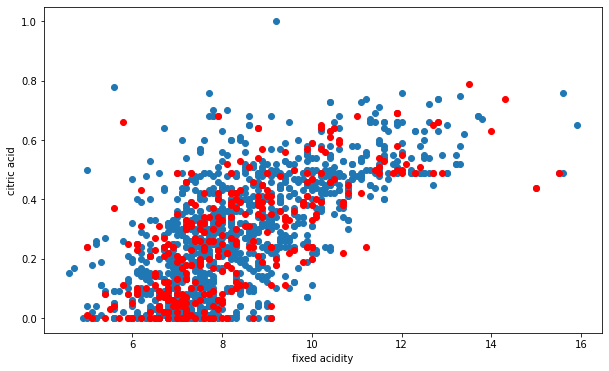

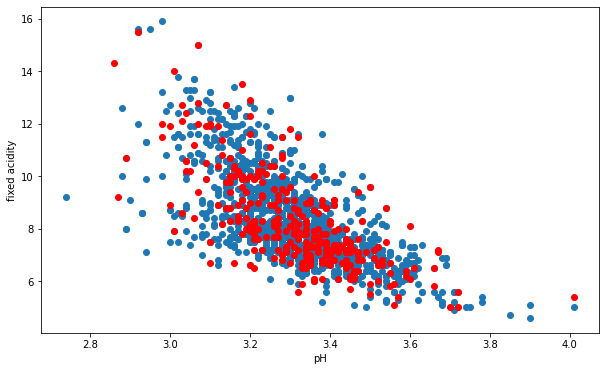

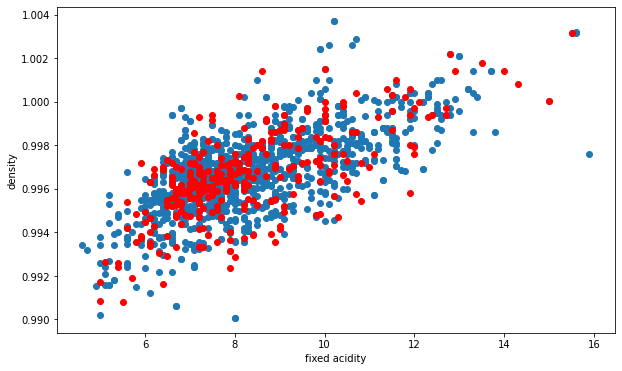

In [201]:
# Visualize Correlation between specific pairs
plt.figure(figsize=(10, 6))
plt.scatter(X1_train,Y1_train)
plt.scatter(X1_test,Y1_test, color="r")
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X2_train,Y2_train)
plt.scatter(X2_test,Y2_test, color="r")
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X3_train,Y3_train)
plt.scatter(X3_test,Y3_test, color="r")
plt.xlabel('fixed acidity')
plt.ylabel('density')
plt.show()

In [203]:
X1_train_mean, X1_train_std = X1_train.mean(), X1_train.std()
Y1_train_mean, Y1_train_std = Y1_train.mean(), Y1_train.std()

X1_train_norm = (X1_train - X1_train_mean) / X1_train_std
Y1_train_norm = (Y1_train - Y1_train_mean) / Y1_train_std

X1_test_mean, X1_test_std = X1_test.mean(), X1_test.std()
Y1_test_mean, Y1_test_std = Y1_test.mean(), Y1_test.std()

X1_test_norm = (X1_test - X1_test_mean) / X1_test_std
Y1_test_norm = (Y1_test - Y1_test_mean) / Y1_test_std

X2_train_mean, X2_train_std = X2_train.mean(), X2_train.std()
Y2_train_mean, Y2_train_std = Y2_train.mean(), Y2_train.std()

X2_train_norm = (X2_train - X2_train_mean) / X2_train_std
Y2_train_norm = (Y2_train - Y2_train_mean) / Y2_train_std

X2_test_mean, X2_test_std = X2_test.mean(), X2_test.std()
Y2_test_mean, Y2_test_std = Y2_test.mean(), Y2_test.std()

X2_test_norm = (X2_test - X2_test_mean) / X2_test_std
Y2_test_norm = (Y2_test - Y2_test_mean) / Y2_test_std

X3_train_mean, X3_train_std = X3_train.mean(), X3_train.std()
Y3_train_mean, Y3_train_std = Y3_train.mean(), Y3_train.std()

X3_train_norm = (X3_train - X3_train_mean) / X3_train_std
Y3_train_norm = (Y3_train - Y3_train_mean) / Y3_train_std

X3_test_mean, X3_test_std = X3_test.mean(), X3_test.std()
Y3_test_mean, Y3_test_std = Y3_test.mean(), Y3_test.std()

X3_test_norm = (X3_test - X3_test_mean) / X3_test_std
Y3_test_norm = (Y3_test - Y3_test_mean) / Y3_test_std



In [204]:
def Linear_Regression(epochs, X, Y, n, L, Y_norm):

    m = 0
    c = 0

    for i in range(epochs):
        Y_pred = m*X + c
        D_m = (-2/n) * np.sum(X * (Y - Y_pred))
        D_c = (-2/n) * np.sum(Y - Y_pred)

        if np.isnan(m) or np.isnan(c):
            print("NaN detected at iteration", i)
            break

        m = m - L * D_m
        c = c - L * D_c

        loss = np.mean((Y_norm - Y_pred)**2)
        if i == epochs - 1:
            print(f"Epoch {i+1}, Loss: {loss}") 

    return (m, c, Y_pred)

Epoch 10000, Loss: 0.5521760300067533
Epoch 10000, Loss: 0.54275759644467
Epoch 10000, Loss: 0.5636379686789197


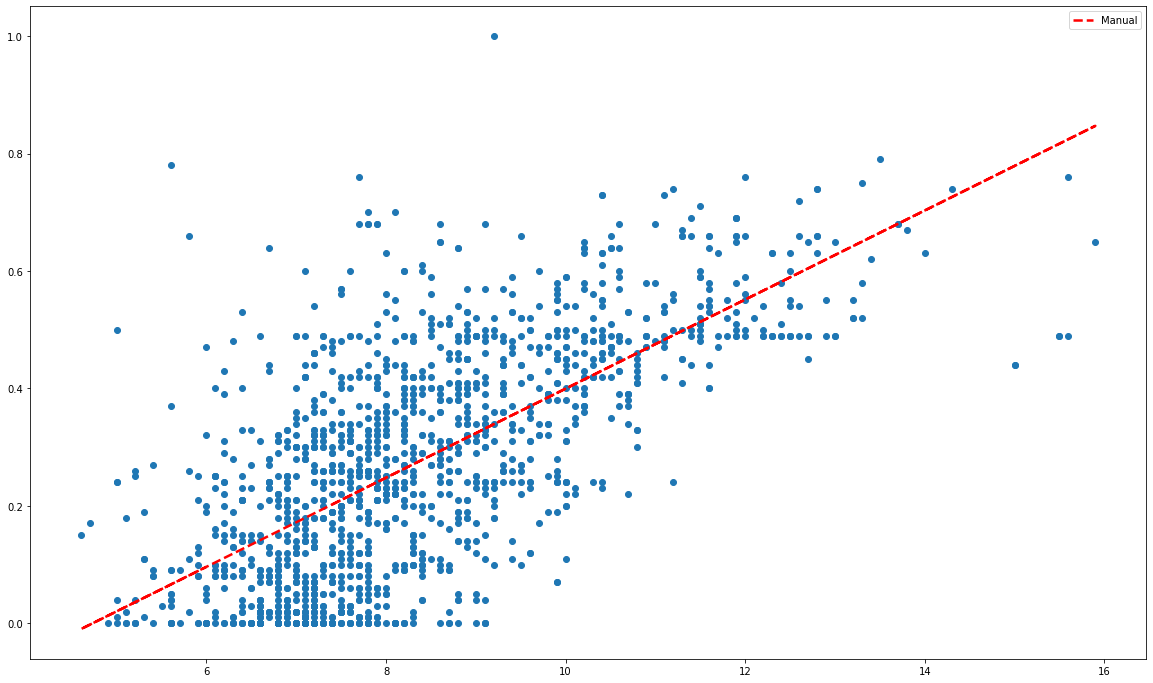

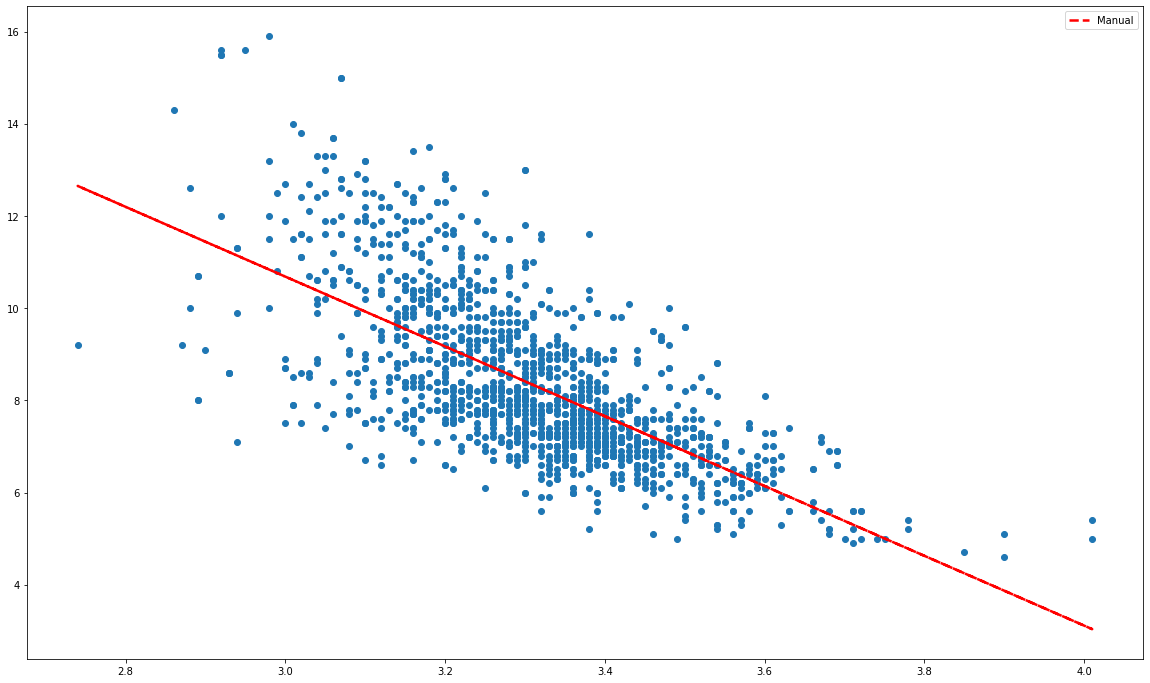

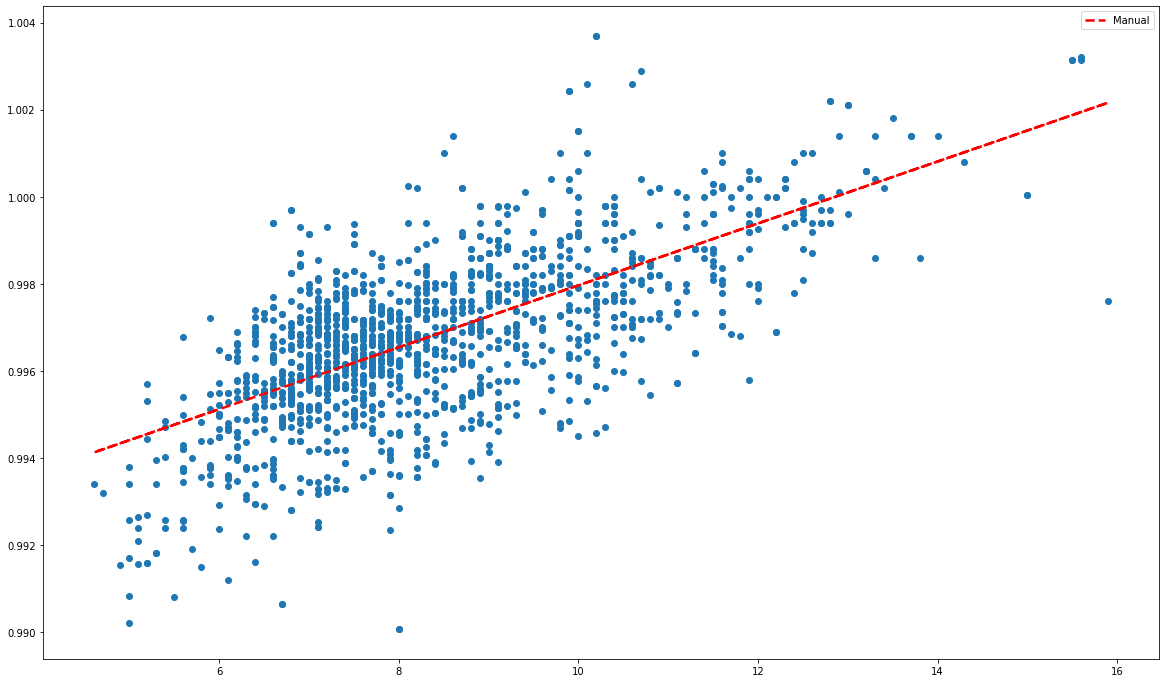

In [205]:
L = 0.01
epochs = 10000
n = float(len(X1_train_norm))

(m1, c1, Y1_pred) = Linear_Regression(epochs, X1_train_norm, Y1_train_norm, n, L, Y1_train_norm)

(m2, c2, Y2_pred) = Linear_Regression(epochs, X2_train_norm, Y2_train_norm, n, L, Y2_train_norm)

(m3, c3, Y3_pred) = Linear_Regression(epochs, X3_train_norm, Y3_train_norm, n, L, Y3_train_norm)

m1_original = m1 * (Y1_train_std / X1_train_std)
c1_original = Y1_train_mean + c1 * Y1_train_std - m1_original * X1_train_mean
Y1_pred = m1_original * X1 + c1_original

m2_original = m2 * (Y2_train_std / X2_train_std)
c2_original = Y2_train_mean + c2 * Y2_train_std - m2_original * X2_train_mean
Y2_pred = m2_original * X2 + c2_original

m3_original = m3 * (Y3_train_std / X3_train_std)
c3_original = Y3_train_mean + c3 * Y3_train_std - m3_original * X3_train_mean
Y3_pred = m3_original * X3 + c3_original

plt.figure(figsize=(20, 12))
plt.scatter(X1, Y1)
plt.plot(X1, m1_original * X1 + c1_original, label="Manual", color="r", linestyle="--", linewidth = '2.5')
plt.legend()
plt.show()

plt.figure(figsize=(20, 12))
plt.scatter(X2, Y2)
plt.plot(X2, m2_original * X2 + c2_original, label="Manual", color="r", linestyle="--", linewidth = '2.5')
plt.legend()
plt.show()

plt.figure(figsize=(20, 12))
plt.scatter(X3, Y3)
plt.plot(X3, m3_original * X3 + c3_original, label="Manual", color="r", linestyle="--", linewidth = '2.5')
plt.legend()
plt.show()

In [207]:
from sklearn.metrics import mean_squared_error, r2_score

# Model 1
Y1_test_pred = m1_original * X1_test + c1_original
print("Manual Model 1 (test set)")
print("  R²:", r2_score(Y1_test, Y1_test_pred))
print("  MSE:", mean_squared_error(Y1_test, Y1_test_pred))

# Model 2
Y2_test_pred = m2_original * X2_test + c2_original
print("Manual Model 2 (test set)")
print("  R²:", r2_score(Y2_test, Y2_test_pred))
print("  MSE:", mean_squared_error(Y2_test, Y2_test_pred))

# Model 3
Y3_test_pred = m3_original * X3_test + c3_original
print("Manual Model 3 (test set)")
print("  R²:", r2_score(Y3_test, Y3_test_pred))
print("  MSE:", mean_squared_error(Y3_test, Y3_test_pred))

Manual Model 1 (test set)
  R²: 0.4640279770764686
  MSE: 0.01977468778576369
Manual Model 2 (test set)
  R²: 0.4991930581486943
  MSE: 1.6348000928506459
Manual Model 3 (test set)
  R²: 0.4768380541416002
  MSE: 2.1012552667923432e-06


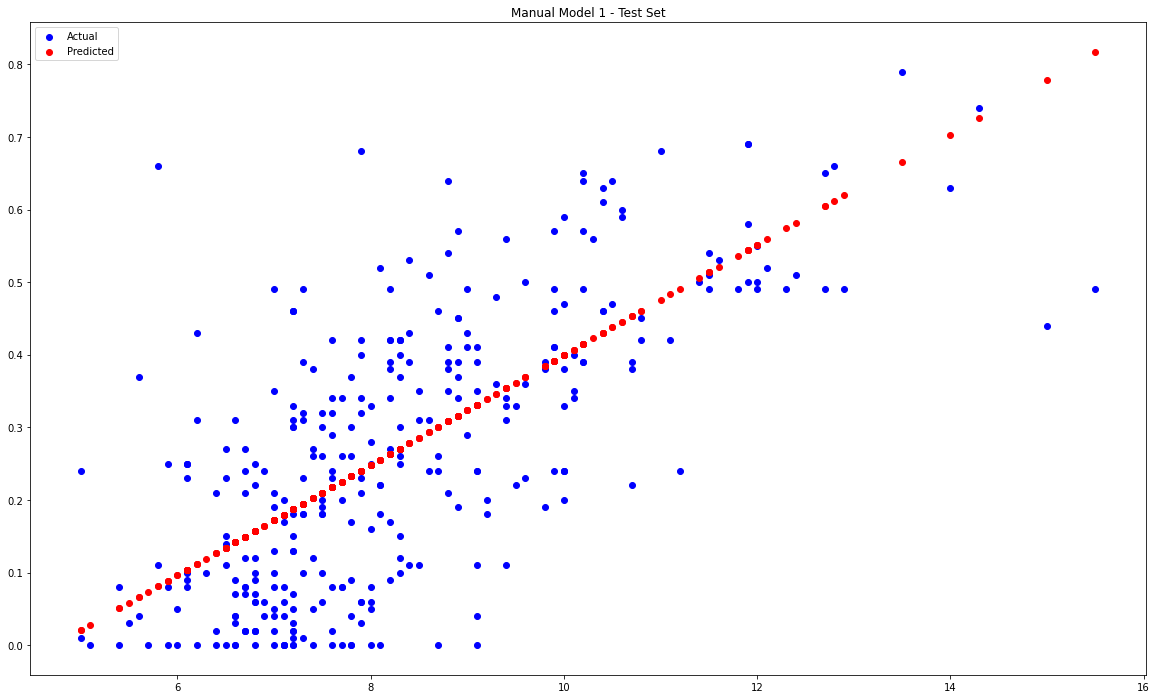

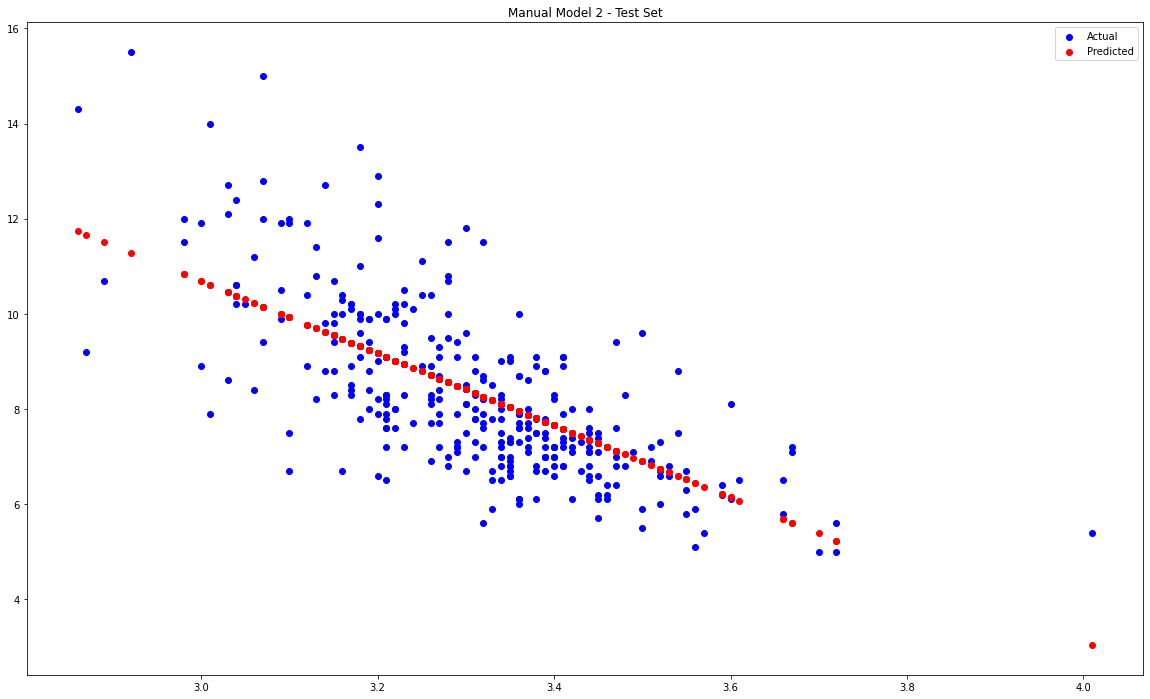

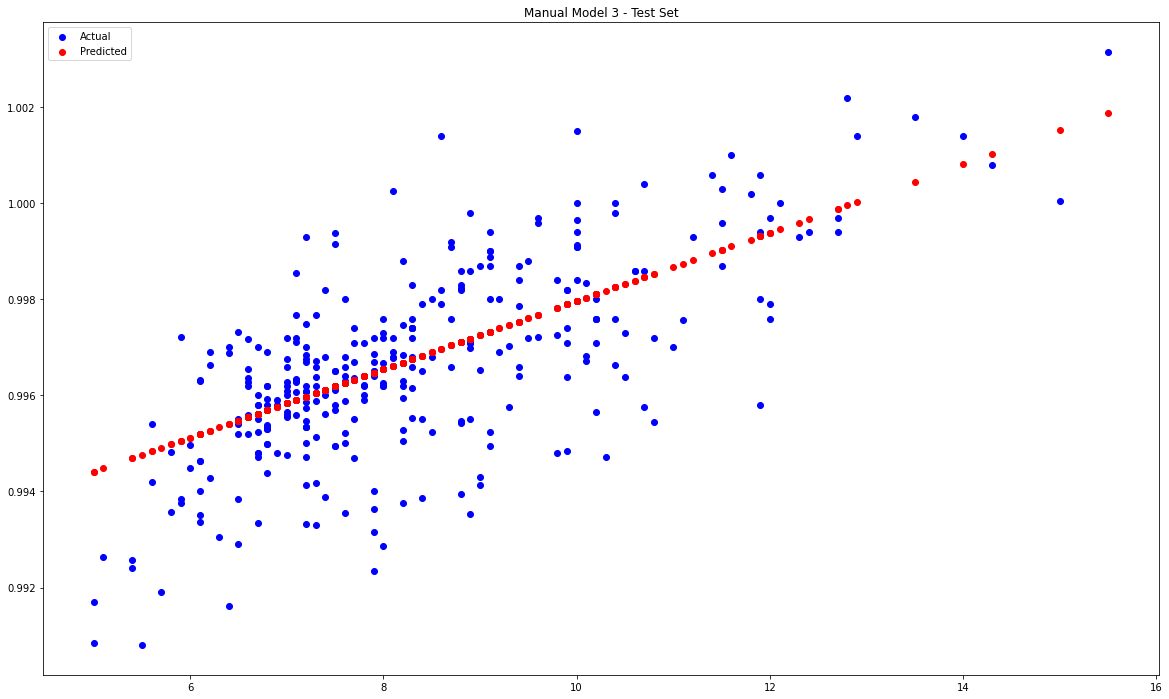

In [211]:
plt.figure(figsize=(20, 12))
plt.scatter(X1_test, Y1_test, label="Actual", color='blue')
plt.scatter(X1_test, Y1_test_pred, label="Predicted", color='red')
plt.title("Manual Model 1 - Test Set")
plt.legend()
plt.show()

plt.figure(figsize=(20, 12))
plt.scatter(X2_test, Y2_test, label="Actual", color='blue')
plt.scatter(X2_test, Y2_test_pred, label="Predicted", color='red')
plt.title("Manual Model 2 - Test Set")
plt.legend()
plt.show()

plt.figure(figsize=(20, 12))
plt.scatter(X3_test, Y3_test, label="Actual", color='blue')
plt.scatter(X3_test, Y3_test_pred, label="Predicted", color='red')
plt.title("Manual Model 3 - Test Set")
plt.legend()
plt.show()

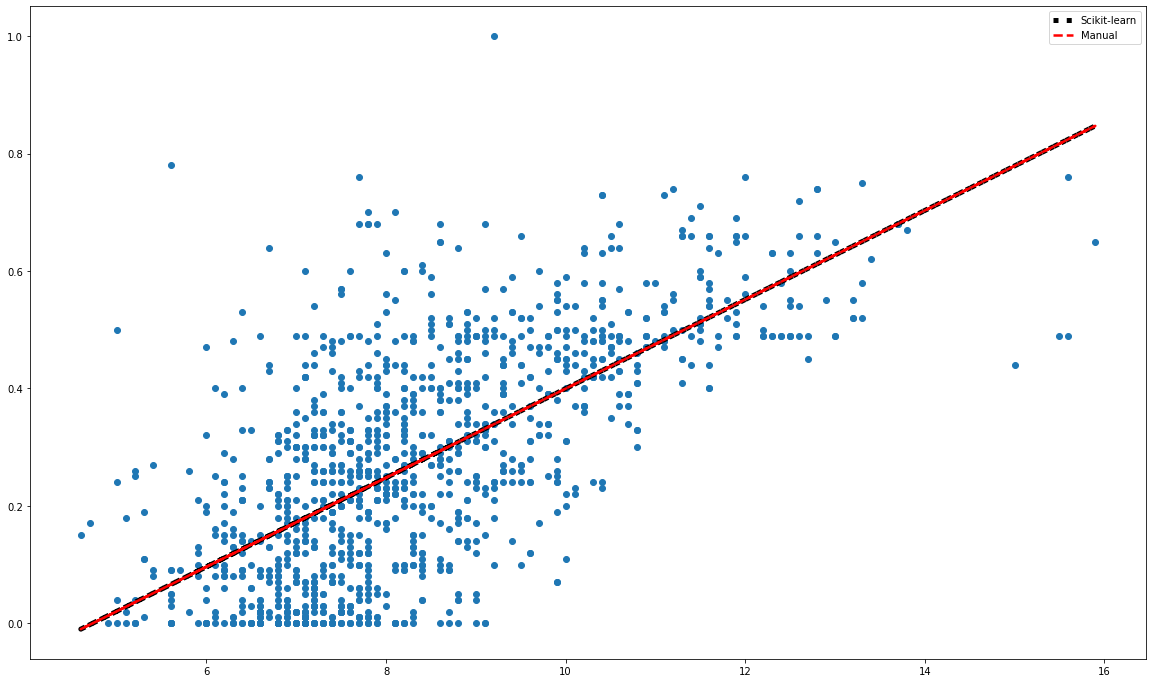

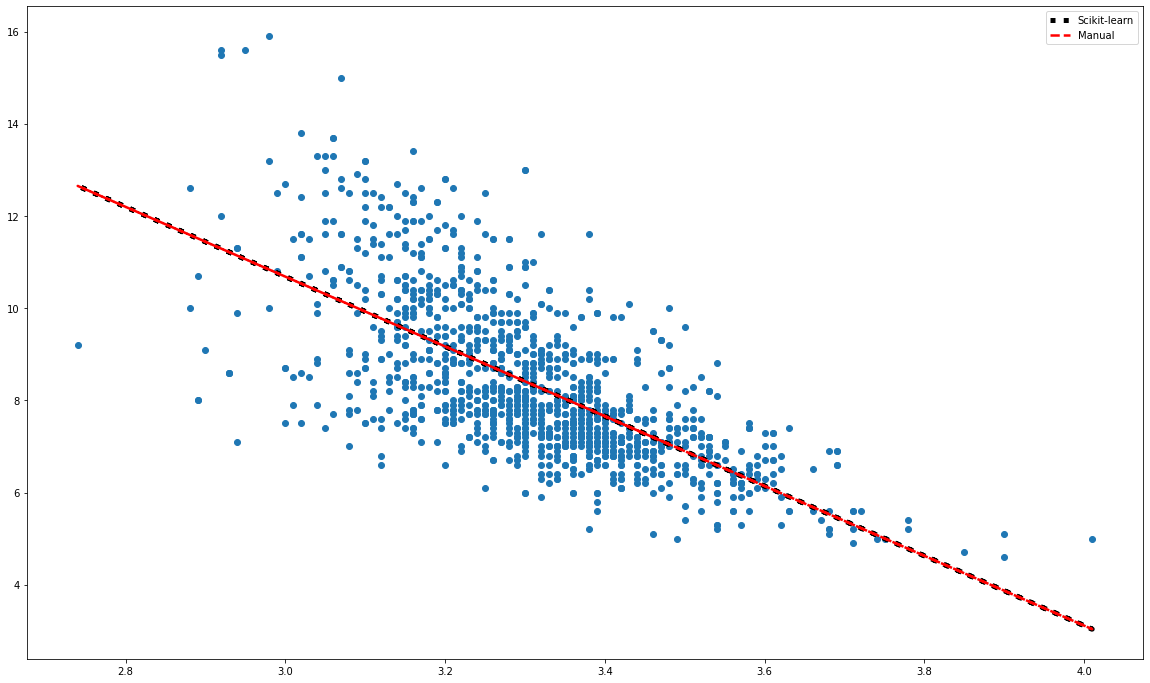

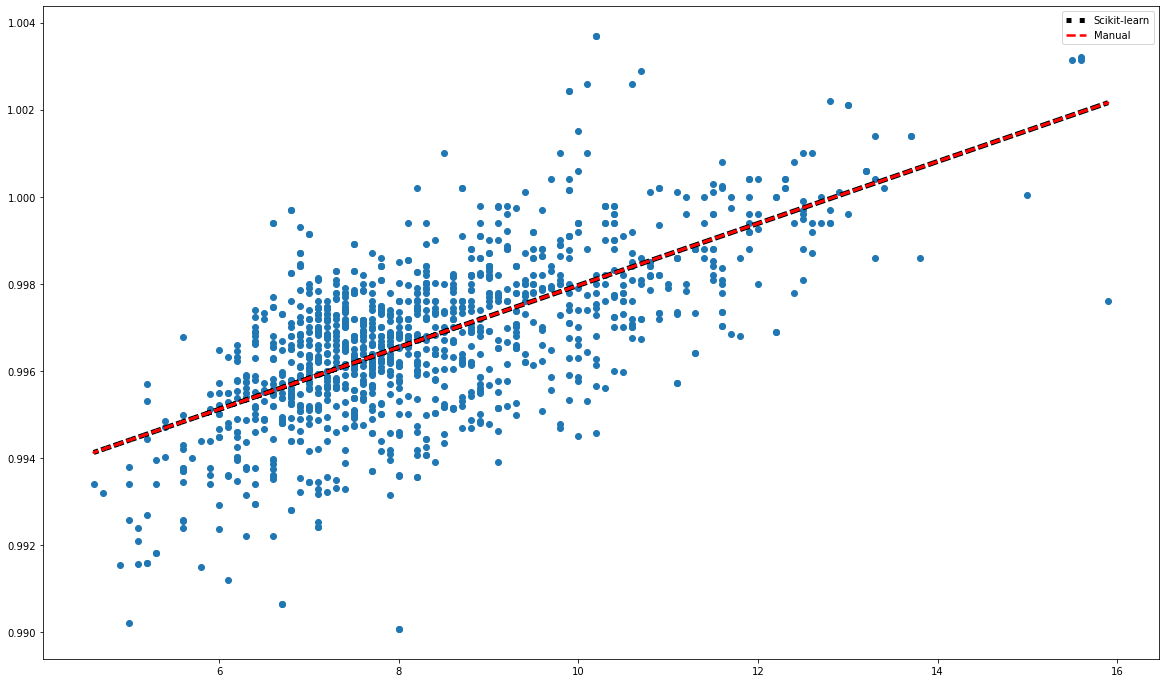

In [210]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X1_train.reshape(-1, 1), Y1_train)
Y1_pred = model1.predict(X1_train.reshape(-1, 1))

plt.figure(figsize=(20, 12))
plt.scatter(X1_train, Y1_train)
plt.plot(X1_train, model1.predict(X1_train.reshape(-1, 1)), label="Scikit-learn", color="k", linestyle=":", linewidth = '5')
plt.plot(X1_train, m1_original * X1_train + c1_original, label="Manual", color="r", linestyle="--", linewidth = '2.5')
plt.legend()
plt.show()

model2 = LinearRegression()
model2.fit(X2_train.reshape(-1, 1), Y2_train)
Y2_pred = model2.predict(X2_train.reshape(-1, 1))

plt.figure(figsize=(20, 12))
plt.scatter(X2_train, Y2_train)
plt.plot(X2_train, model2.predict(X2_train.reshape(-1, 1)), label="Scikit-learn", color="k", linestyle=":", linewidth = '5')
plt.plot(X2_train, m2_original * X2_train + c2_original, label="Manual", color="r", linestyle="--", linewidth = '2.5')
plt.legend()
plt.show()

model3 = LinearRegression()
model3.fit(X3_train.reshape(-1, 1), Y3_train)
Y3_pred = model3.predict(X3_train.reshape(-1, 1))

plt.figure(figsize=(20, 12))
plt.scatter(X3_train, Y3_train)
plt.plot(X3_train, model3.predict(X3_train.reshape(-1, 1)), label="Scikit-learn", color="k", linestyle=":", linewidth = '5')
plt.plot(X3_train, m3_original * X3_train + c3_original, label="Manual", color="r", linestyle="--", linewidth = '2.5')
plt.legend()
plt.show()